In [1]:
import matplotlib.pyplot as plt
from src.pvsys import ShadedArray

In [2]:
IRRADIANCE_1 = 900
IRRADIANCE_2 = 600
IRRADIANCE_3 = 300
TEMPERATURE_1 = 16.88
TEMPERATURE_2 = 16.25
TEMPERATURE_3 = 15.625
CELL_TEMP_1 = ShadedArray.cell_temp_from_ambient(IRRADIANCE_1, TEMPERATURE_1)
CELL_TEMP_2 = ShadedArray.cell_temp_from_ambient(IRRADIANCE_2, TEMPERATURE_2)
CELL_TEMP_3 = ShadedArray.cell_temp_from_ambient(IRRADIANCE_3, TEMPERATURE_3)

pvsyss = ShadedArray.get_default_array()

plt.rc("text", usetex=True)
plt.rc("font", family="serif")

In [3]:
pvsyss.simulate(
    duty_cycle=0.0,
    irradiance=[IRRADIANCE_1, ] * 4,
    ambient_temperature=[TEMPERATURE_1, ] * 4,
)
uniform_curve_1 = pvsyss.get_shaded_iv_curve(curve_points=1000)
power_1 = pvsyss.power(uniform_curve_1.voltage, uniform_curve_1.current)
mpp_1 = pvsyss.mpp_from_curve(uniform_curve_1)

pvsyss.simulate(
    duty_cycle=0.0,
    irradiance=[IRRADIANCE_2, ] * 4,
    ambient_temperature=[TEMPERATURE_2, ] * 4,
)
uniform_curve_2 = pvsyss.get_shaded_iv_curve(curve_points=1000)
power_2 = pvsyss.power(uniform_curve_2.voltage, uniform_curve_2.current)
mpp_2 = pvsyss.mpp_from_curve(uniform_curve_2)

pvsyss.simulate(
    duty_cycle=0.0,
    irradiance=[IRRADIANCE_3, ] * 4,
    ambient_temperature=[TEMPERATURE_3, ] * 4,
)
uniform_curve_3 = pvsyss.get_shaded_iv_curve(curve_points=1000)
power_3 = pvsyss.power(uniform_curve_3.voltage, uniform_curve_3.current)
mpp_3 = pvsyss.mpp_from_curve(uniform_curve_3)


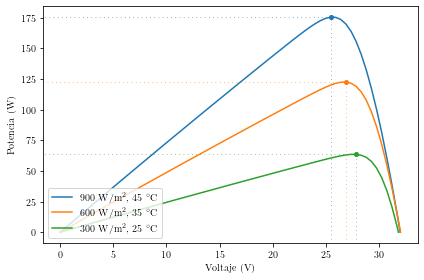

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xlabel("Voltaje (V)")
ax.set_ylabel("Potencia (W)")

# Plot P-V curves
ax.plot(uniform_curve_1.voltage, power_1, label=f'{IRRADIANCE_1} $\mathrm{{W/m^2}}$, {CELL_TEMP_1:0.0f} $^\circ \mathrm{{C}}$')
ax.plot(uniform_curve_2.voltage, power_2, label=f'{IRRADIANCE_2} $\mathrm{{W/m^2}}$, {CELL_TEMP_2:0.0f} $^\circ \mathrm{{C}}$')
ax.plot(uniform_curve_3.voltage, power_3, label=f'{IRRADIANCE_3} $\mathrm{{W/m^2}}$, {CELL_TEMP_3:0.0f} $^\circ \mathrm{{C}}$')

ax.set_prop_cycle(None) # Reset color cycle

# Plot MPP
ax.plot(mpp_1.voltage, mpp_1.voltage * mpp_1.current, 'o', markersize=4)
ax.plot(mpp_2.voltage, mpp_2.voltage * mpp_2.current, 'o', markersize=4)
ax.plot(mpp_3.voltage, mpp_3.voltage * mpp_3.current, 'o', markersize=4)

ax.set_prop_cycle(None)

# Save current limits
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Plot lines from MPP to x-axis
ax.plot([mpp_1.voltage, ] * 2, [-100, mpp_1.voltage * mpp_1.current], linestyle='--', dashes=(1, 5), linewidth=0.7)
ax.plot([mpp_2.voltage, ] * 2, [-100, mpp_2.voltage * mpp_2.current], linestyle='--', dashes=(1, 5), linewidth=0.7)
ax.plot([mpp_3.voltage, ] * 2, [-100, mpp_3.voltage * mpp_3.current], linestyle='--', dashes=(1, 5), linewidth=0.7)

ax.set_prop_cycle(None)

# Plot lines from MPP to y-axis
ax.plot([mpp_1.voltage, max(uniform_curve_1.voltage) * -2], [mpp_1.voltage * mpp_1.current, ] * 2, linestyle='--', dashes=(1, 5), linewidth=0.7)
ax.plot([mpp_2.voltage, max(uniform_curve_2.voltage) * -2], [mpp_2.voltage * mpp_2.current, ] * 2, linestyle='--', dashes=(1, 5), linewidth=0.7)
ax.plot([mpp_3.voltage, max(uniform_curve_3.voltage) * -2], [mpp_3.voltage * mpp_3.current, ] * 2, linestyle='--', dashes=(1, 5), linewidth=0.7)

# Restore limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.legend(loc='lower left')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

fig.savefig(r'output/ch2_09_pv_curve_three_sets.pdf', bbox_inches='tight')